<a href="https://colab.research.google.com/github/seulayoon/deep-learning-from-scratch/blob/master/%EC%86%90%EA%B8%80%EC%94%A8%EC%88%AB%EC%9E%90%EB%B6%84%EB%A5%98(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST 데이터셋

In [ ]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [ ]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
import numpy as np
from PIL import Image

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28) # 원래 이미지의 모양으로 변형
print(img.shape)

5
(784,)
(28, 28)


In [ ]:
img_show(img)

Colab notebook에서는 PIL Image를 출력하지 않는다.
matplotlib를 이용하자.

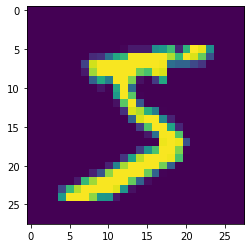

In [ ]:
from matplotlib.pyplot import imshow
%matplotlib inline

#image is a numpy array
imshow(img)

## 신경망의 추론 처리

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    
    
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  
  return y

In [ ]:
def get_data():
  (x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, flatten = True, one_hot_label = False)

  return x_test, t_test

def init_network():
  with open("sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)

    return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [ ]:
import pickle

x, t = get_data() # 추론(test) 데이터 가져오기
network = init_network() # 가중치 매개변수 가져오기

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
  if p == t[i]:
    accuracy_cnt += 1

print("Accuracy: "  + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


## 배치 처리

In [ ]:
x.shape

(10000, 784)

In [ ]:
x[0].shape

(784,)

In [ ]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [ ]:
W1.shape

(784, 50)

In [ ]:
W2.shape

(50, 100)

In [ ]:
W3.shape

(100, 10)

In [ ]:
batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i: i + batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis = 1)
  accuracy_cnt += np.sum(p == t[i: i + batch_size])

print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352
